In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

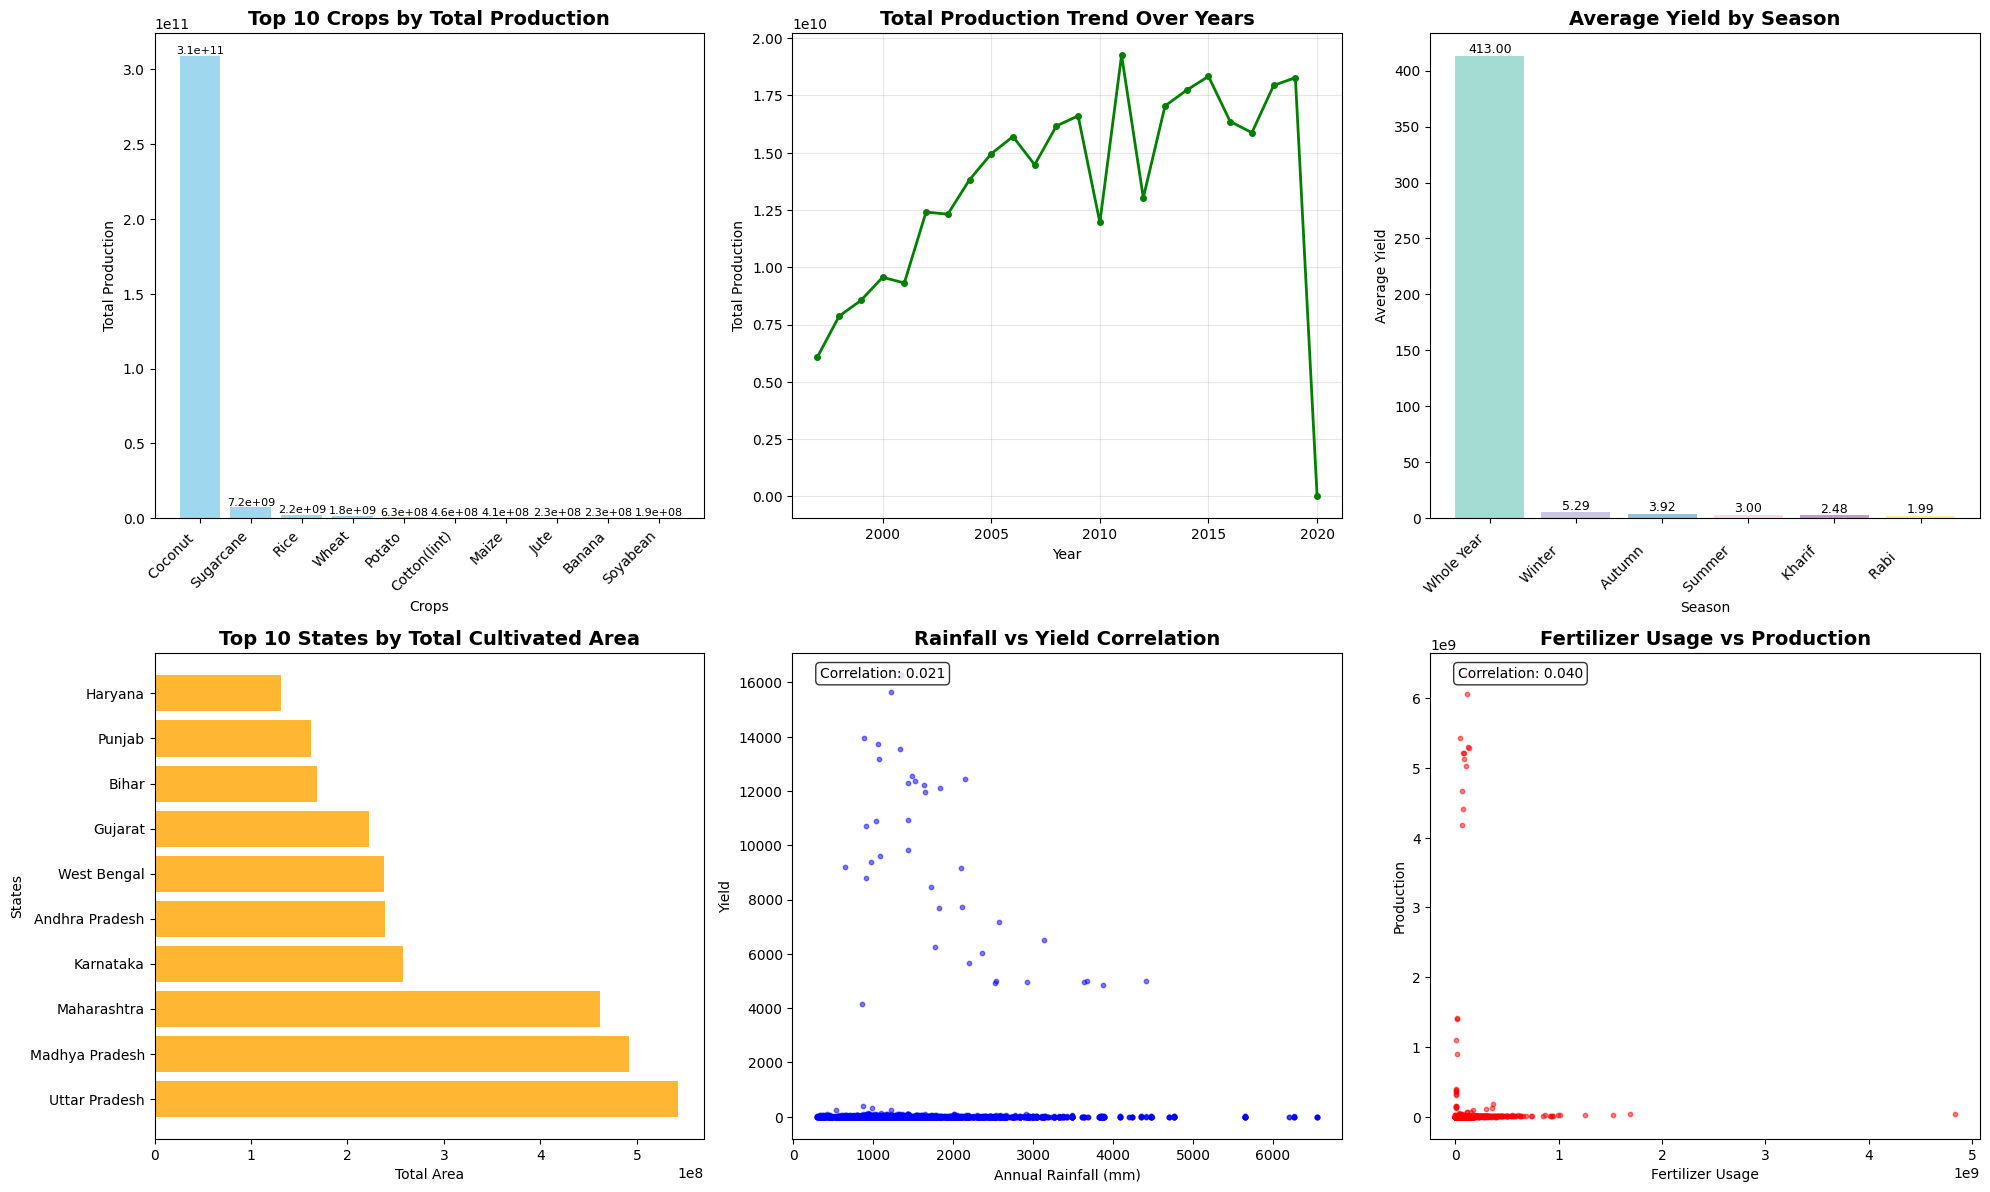

In [7]:
# Create a comprehensive dashboard with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Top 10 Crops by Total Production
plt.subplot(4, 3, 1)
top_crops_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)
bars1 = plt.bar(range(len(top_crops_production)), top_crops_production.values, color='skyblue', alpha=0.8)
plt.title('Top 10 Crops by Total Production', fontsize=14, fontweight='bold')
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.xticks(range(len(top_crops_production)), top_crops_production.index, rotation=45, ha='right')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))


for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1e}', ha='center', va='bottom', fontsize=8)

# 2. Production Trend Over Years
plt.subplot(4, 3, 2)
yearly_production = df.groupby('Crop_Year')['Production'].sum()
plt.plot(yearly_production.index, yearly_production.values, marker='o', linewidth=2, markersize=4, color='green')
plt.title('Total Production Trend Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 3. Yield Distribution by Season
plt.subplot(4, 3, 3)
season_yield = df.groupby('Season')['Yield'].mean().sort_values(ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(season_yield)))
bars3 = plt.bar(season_yield.index, season_yield.values, color=colors, alpha=0.8)
plt.title('Average Yield by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Average Yield')
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# 4. Top 10 States by Total Area Under Cultivation
plt.subplot(4, 3, 4)
top_states_area = df.groupby('State')['Area'].sum().sort_values(ascending=False).head(10)
bars4 = plt.barh(range(len(top_states_area)), top_states_area.values, color='orange', alpha=0.8)
plt.title('Top 10 States by Total Cultivated Area', fontsize=14, fontweight='bold')
plt.xlabel('Total Area')
plt.ylabel('States')
plt.yticks(range(len(top_states_area)), top_states_area.index)
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))



# 5. Rainfall vs Yield Correlation
plt.subplot(4, 3, 5)
sample_data = df.sample(n=min(5000, len(df)))  # Sample for better visualization
plt.scatter(sample_data['Annual_Rainfall'], sample_data['Yield'], alpha=0.5, color='blue', s=10)
plt.title('Rainfall vs Yield Correlation', fontsize=14, fontweight='bold')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Yield')
correlation = df['Annual_Rainfall'].corr(df['Yield'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))



# 6. Fertilizer Usage vs Production
plt.subplot(4, 3, 6)
sample_data2 = df.sample(n=min(5000, len(df)))
plt.scatter(sample_data2['Fertilizer'], sample_data2['Production'], alpha=0.5, color='red', s=10)
plt.title('Fertilizer Usage vs Production', fontsize=14, fontweight='bold')
plt.xlabel('Fertilizer Usage')
plt.ylabel('Production')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
correlation2 = df['Fertilizer'].corr(df['Production'])
plt.text(0.05, 0.95, f'Correlation: {correlation2:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_2992\3944994883.py:103: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(rainfall_data, labels=top_states_data, patch_artist=True)


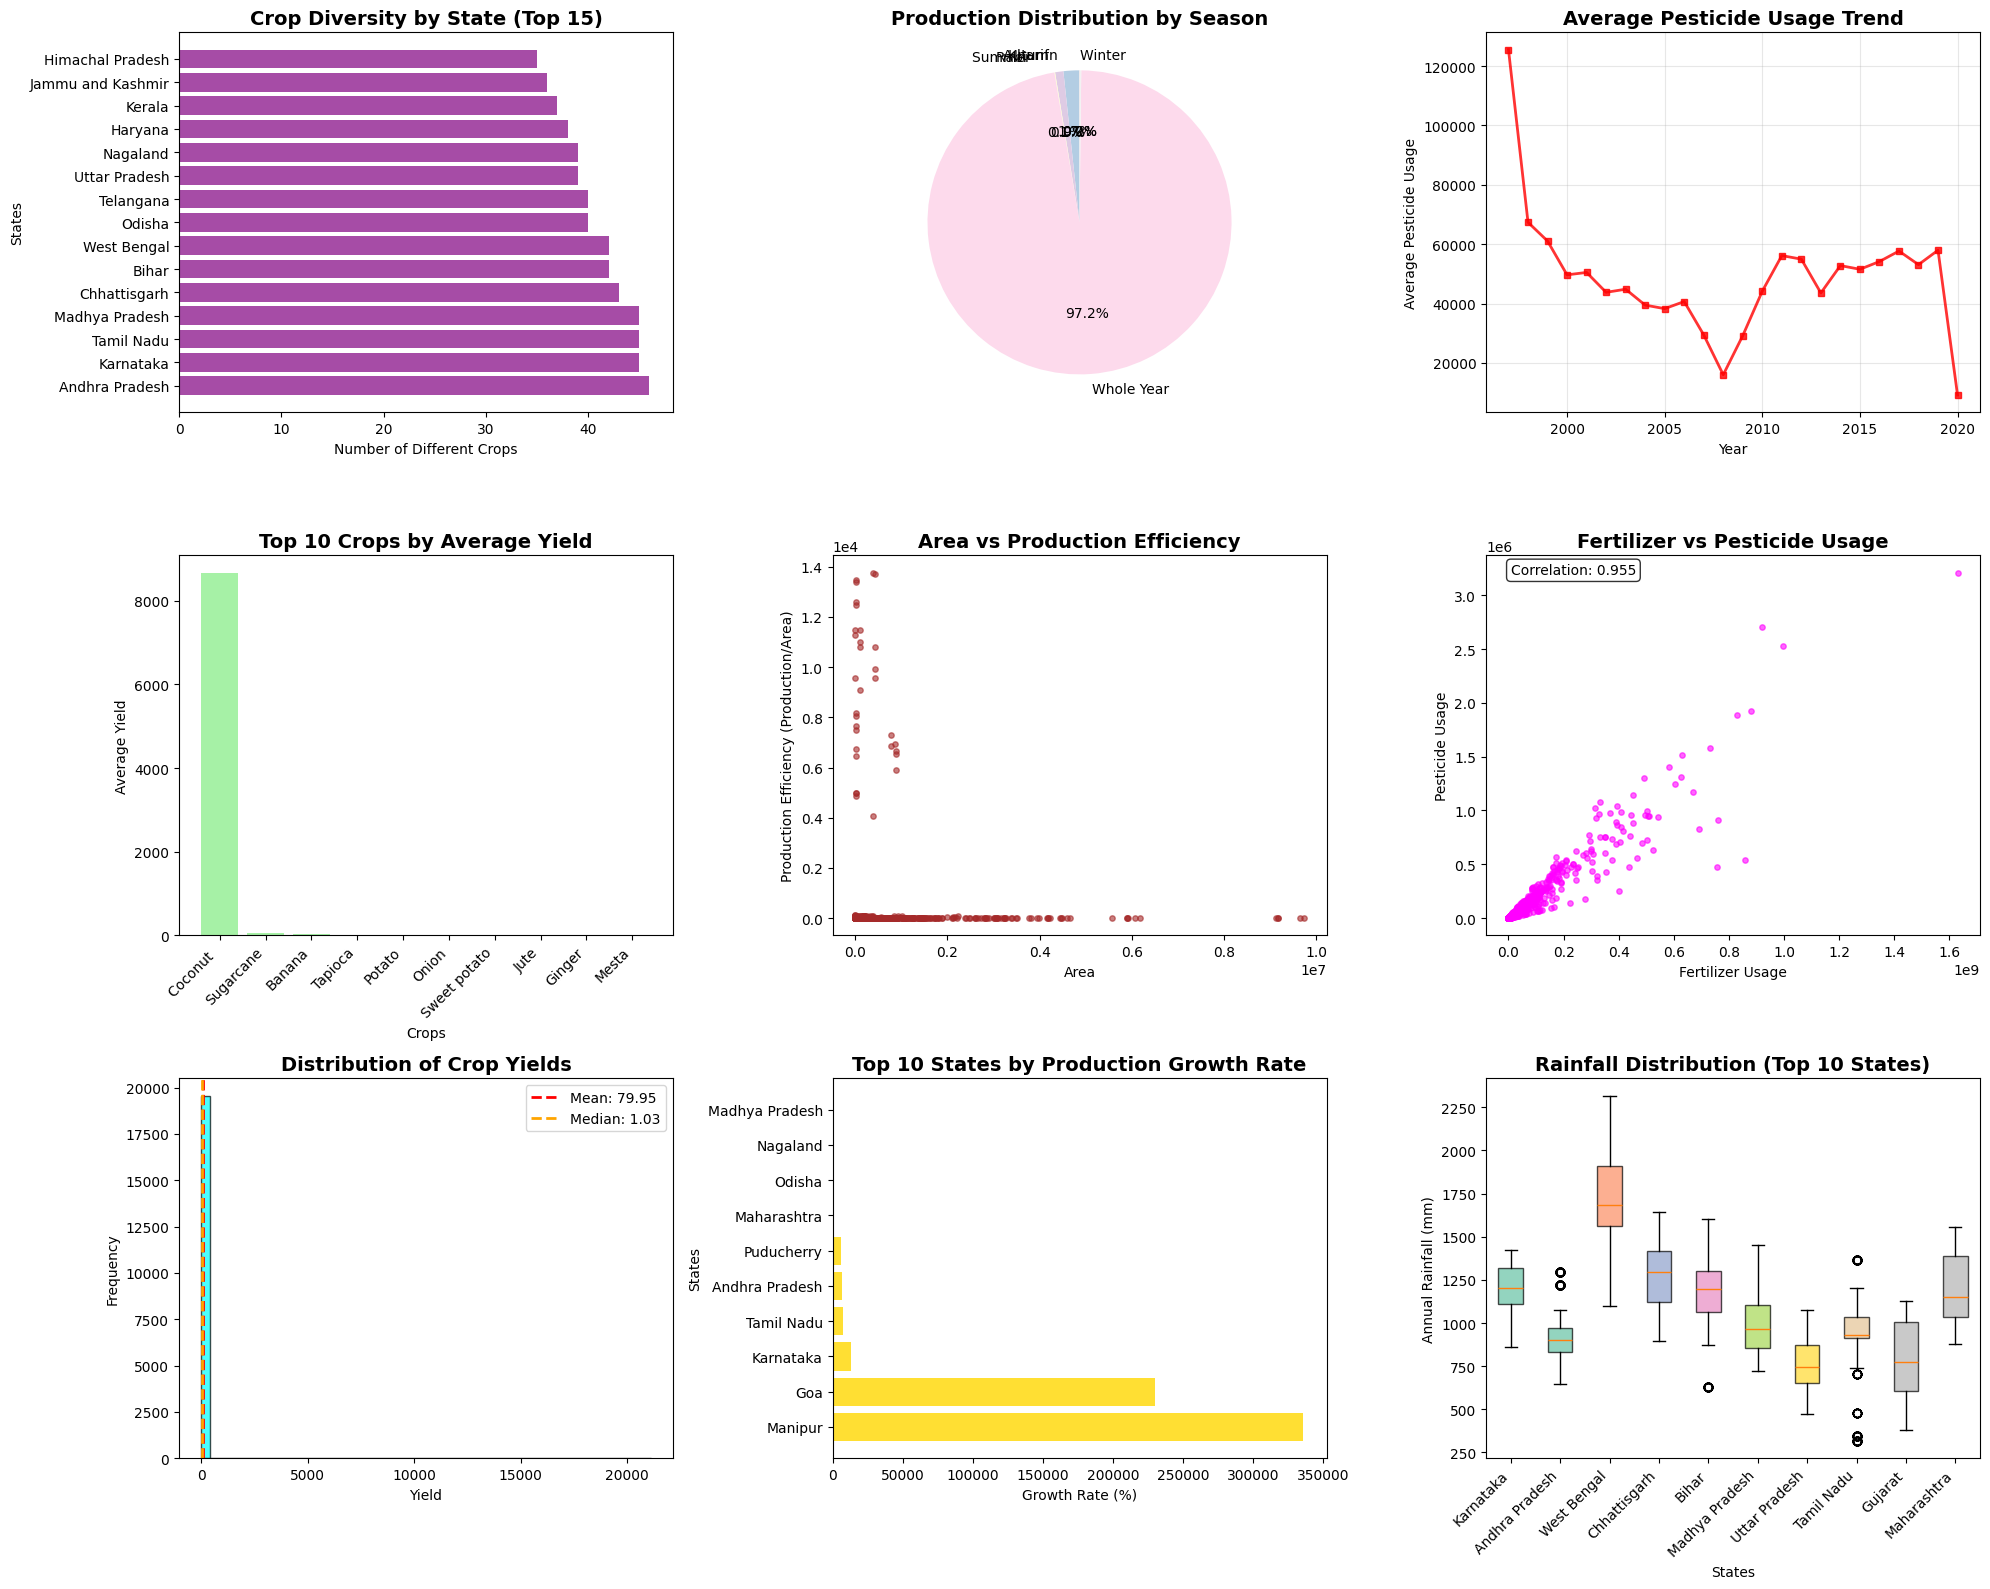

In [8]:
# Create second part of the dashboard
fig = plt.figure(figsize=(20, 16))

# 7. Crop Diversity by State (Top 15 states)
plt.subplot(3, 3, 1)
crop_diversity = df.groupby('State')['Crop'].nunique().sort_values(ascending=False).head(15)
bars7 = plt.barh(range(len(crop_diversity)), crop_diversity.values, color='purple', alpha=0.7)
plt.title('Crop Diversity by State (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Different Crops')
plt.ylabel('States')
plt.yticks(range(len(crop_diversity)), crop_diversity.index)

# 8. Seasonal Production Distribution (Pie Chart)
plt.subplot(3, 3, 2)
seasonal_production = df.groupby('Season')['Production'].sum()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(seasonal_production)))
wedges, texts, autotexts = plt.pie(seasonal_production.values, labels=seasonal_production.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Production Distribution by Season', fontsize=14, fontweight='bold')


# 9. Pesticide Usage Trend Over Years
plt.subplot(3, 3, 3)
yearly_pesticide = df.groupby('Crop_Year')['Pesticide'].mean()
plt.plot(yearly_pesticide.index, yearly_pesticide.values, marker='s', linewidth=2, 
         markersize=4, color='red', alpha=0.8)
plt.title('Average Pesticide Usage Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Pesticide Usage')
plt.grid(True, alpha=0.3)


# 10. Top 10 Most Productive Crops (Yield per unit area)
plt.subplot(3, 3, 4)
avg_yield_by_crop = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)
bars10 = plt.bar(range(len(avg_yield_by_crop)), avg_yield_by_crop.values, 
                 color='lightgreen', alpha=0.8)
plt.title('Top 10 Crops by Average Yield', fontsize=14, fontweight='bold')
plt.xlabel('Crops')
plt.ylabel('Average Yield')
plt.xticks(range(len(avg_yield_by_crop)), avg_yield_by_crop.index, rotation=45, ha='right')



# 11. Area vs Production Efficiency
plt.subplot(3, 3, 5)
# Calculate efficiency as Production per unit Area
df['Efficiency'] = df['Production'] / df['Area']
sample_data3 = df.sample(n=min(3000, len(df)))
plt.scatter(sample_data3['Area'], sample_data3['Efficiency'], alpha=0.6, color='brown', s=15)
plt.title('Area vs Production Efficiency', fontsize=14, fontweight='bold')
plt.xlabel('Area')
plt.ylabel('Production Efficiency (Production/Area)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))


# 12. Fertilizer vs Pesticide Usage Correlation
plt.subplot(3, 3, 6)
sample_data4 = df.sample(n=min(3000, len(df)))
plt.scatter(sample_data4['Fertilizer'], sample_data4['Pesticide'], alpha=0.6, color='magenta', s=15)
plt.title('Fertilizer vs Pesticide Usage', fontsize=14, fontweight='bold')
plt.xlabel('Fertilizer Usage')
plt.ylabel('Pesticide Usage')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
correlation3 = df['Fertilizer'].corr(df['Pesticide'])
plt.text(0.05, 0.95, f'Correlation: {correlation3:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


# 13. Yield Distribution Histogram
plt.subplot(3, 3, 7)
plt.hist(df['Yield'], bins=50, color='cyan', alpha=0.7, edgecolor='black')
plt.title('Distribution of Crop Yields', fontsize=14, fontweight='bold')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.axvline(df['Yield'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Yield"].mean():.2f}')
plt.axvline(df['Yield'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["Yield"].median():.2f}')
plt.legend()


# 14. Production Growth Rate by State (Top 10)
plt.subplot(3, 3, 8)
# Calculate growth rate for each state
state_growth = []
for state in df['State'].unique():
    state_data = df[df['State'] == state].groupby('Crop_Year')['Production'].sum()
    if len(state_data) > 1:
        growth_rate = ((state_data.iloc[-1] - state_data.iloc[0]) / state_data.iloc[0]) * 100
        state_growth.append((state, growth_rate))

state_growth_df = pd.DataFrame(state_growth, columns=['State', 'Growth_Rate']).sort_values('Growth_Rate', ascending=False).head(10)
bars14 = plt.barh(range(len(state_growth_df)), state_growth_df['Growth_Rate'], color='gold', alpha=0.8)
plt.title('Top 10 States by Production Growth Rate', fontsize=14, fontweight='bold')
plt.xlabel('Growth Rate (%)')
plt.ylabel('States')
plt.yticks(range(len(state_growth_df)), state_growth_df['State'])


# 15. Rainfall Distribution by State (Box Plot for top 10 states by data points)
plt.subplot(3, 3, 9)
top_states_data = df['State'].value_counts().head(10).index
rainfall_data = [df[df['State'] == state]['Annual_Rainfall'].values for state in top_states_data]
bp = plt.boxplot(rainfall_data, labels=top_states_data, patch_artist=True)
plt.title('Rainfall Distribution (Top 10 States)', fontsize=14, fontweight='bold')
plt.xlabel('States')
plt.ylabel('Annual Rainfall (mm)')
plt.xticks(rotation=45, ha='right')

# Color the boxes
colors = plt.cm.Set2(np.linspace(0, 1, len(bp['boxes'])))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()


In [9]:
# Analyze top performing crops by region (state)
# First, let's define performance metrics: Yield, Production, and Production Efficiency

# Calculate production efficiency (Production per unit Area)
df['Production_Efficiency'] = df['Production'] / df['Area']

# Get top 3 crops by different metrics for each state
def get_top_crops_by_state(metric, top_n=3):
    result = {}
    for state in df['State'].unique():
        state_data = df[df['State'] == state]
        top_crops = state_data.groupby('Crop')[metric].mean().sort_values(ascending=False).head(top_n)
        result[state] = top_crops
    return result

# Get top performers by different metrics
top_by_yield = get_top_crops_by_state('Yield')
top_by_production = get_top_crops_by_state('Production')
top_by_efficiency = get_top_crops_by_state('Production_Efficiency')

print("Analysis complete - calculating top performing crops by region")
print("Metrics calculated: Yield, Total Production, and Production Efficiency")
print("Number of states analyzed:", len(df['State'].unique()))

# Create a comprehensive summary table for top performing crops by state
import pandas as pd

# Create summary dataframes for each metric
summary_data = []

for state in df['State'].unique():
    state_data = df[df['State'] == state]
    
    # Top crop by yield
    top_yield_crop = state_data.groupby('Crop')['Yield'].mean().idxmax()
    top_yield_value = state_data.groupby('Crop')['Yield'].mean().max()
    
    # Top crop by production
    top_production_crop = state_data.groupby('Crop')['Production'].mean().idxmax()
    top_production_value = state_data.groupby('Crop')['Production'].mean().max()
    
    # Top crop by efficiency
    top_efficiency_crop = state_data.groupby('Crop')['Production_Efficiency'].mean().idxmax()
    top_efficiency_value = state_data.groupby('Crop')['Production_Efficiency'].mean().max()
    
    summary_data.append({
        'State': state,
        'Top_Yield_Crop': top_yield_crop,
        'Avg_Yield': round(top_yield_value, 3),
        'Top_Production_Crop': top_production_crop,
        'Avg_Production': round(top_production_value, 0),
        'Top_Efficiency_Crop': top_efficiency_crop,
        'Avg_Efficiency': round(top_efficiency_value, 3)
    })

regional_performance = pd.DataFrame(summary_data)
regional_performance = regional_performance.sort_values('State')

print("Top Performing Crops by State - Summary Table:")
print("=" * 80)
print(regional_performance.to_string(index=False))
print("=" * 80)

Analysis complete - calculating top performing crops by region
Metrics calculated: Yield, Total Production, and Production Efficiency
Number of states analyzed: 30
Top Performing Crops by State - Summary Table:
            State Top_Yield_Crop  Avg_Yield Top_Production_Crop  Avg_Production Top_Efficiency_Crop  Avg_Efficiency
   Andhra Pradesh       Coconut   11734.825            Coconut     1326964581.0            Coconut        12854.592
Arunachal Pradesh      Sugarcane     18.956                Rice        167459.0           Sugarcane          19.573
            Assam       Coconut    7185.238            Coconut      157065045.0            Coconut         7794.524
            Bihar      Sugarcane     48.322           Sugarcane       8521094.0           Sugarcane          49.616
     Chhattisgarh          Bajra     17.101                Rice       5813703.0               Bajra          17.579
            Delhi      Sugarcane     69.291               Wheat         87060.0           Sug

In [10]:
# Create detailed analysis of crop performance patterns
# Analyze which crops dominate in different metrics

print("CROP PERFORMANCE ANALYSIS BY REGION")
print("=" * 50)

# Count how many states each crop dominates in
yield_leaders = regional_performance['Top_Yield_Crop'].value_counts()
production_leaders = regional_performance['Top_Production_Crop'].value_counts()
efficiency_leaders = regional_performance['Top_Efficiency_Crop'].value_counts()

print("\
CROPS LEADING IN YIELD (Number of states):")
print("-" * 40)
for crop, count in yield_leaders.items():
    print(f"{crop}: {count} states")

print("\
CROPS LEADING IN PRODUCTION (Number of states):")
print("-" * 40)
for crop, count in production_leaders.items():
    print(f"{crop}: {count} states")

print("\
CROPS LEADING IN EFFICIENCY (Number of states):")
print("-" * 40)
for crop, count in efficiency_leaders.items():
    print(f"{crop}: {count} states")

CROP PERFORMANCE ANALYSIS BY REGION
CROPS LEADING IN YIELD (Number of states):
----------------------------------------
Sugarcane: 15 states
Coconut : 9 states
Banana: 3 states
Potato: 2 states
Bajra: 1 states
CROPS LEADING IN PRODUCTION (Number of states):
----------------------------------------
Coconut : 9 states
Rice: 8 states
Sugarcane: 5 states
Wheat: 4 states
Maize: 3 states
Potato: 1 states
CROPS LEADING IN EFFICIENCY (Number of states):
----------------------------------------
Sugarcane: 15 states
Coconut : 9 states
Banana: 3 states
Potato: 2 states
Bajra: 1 states


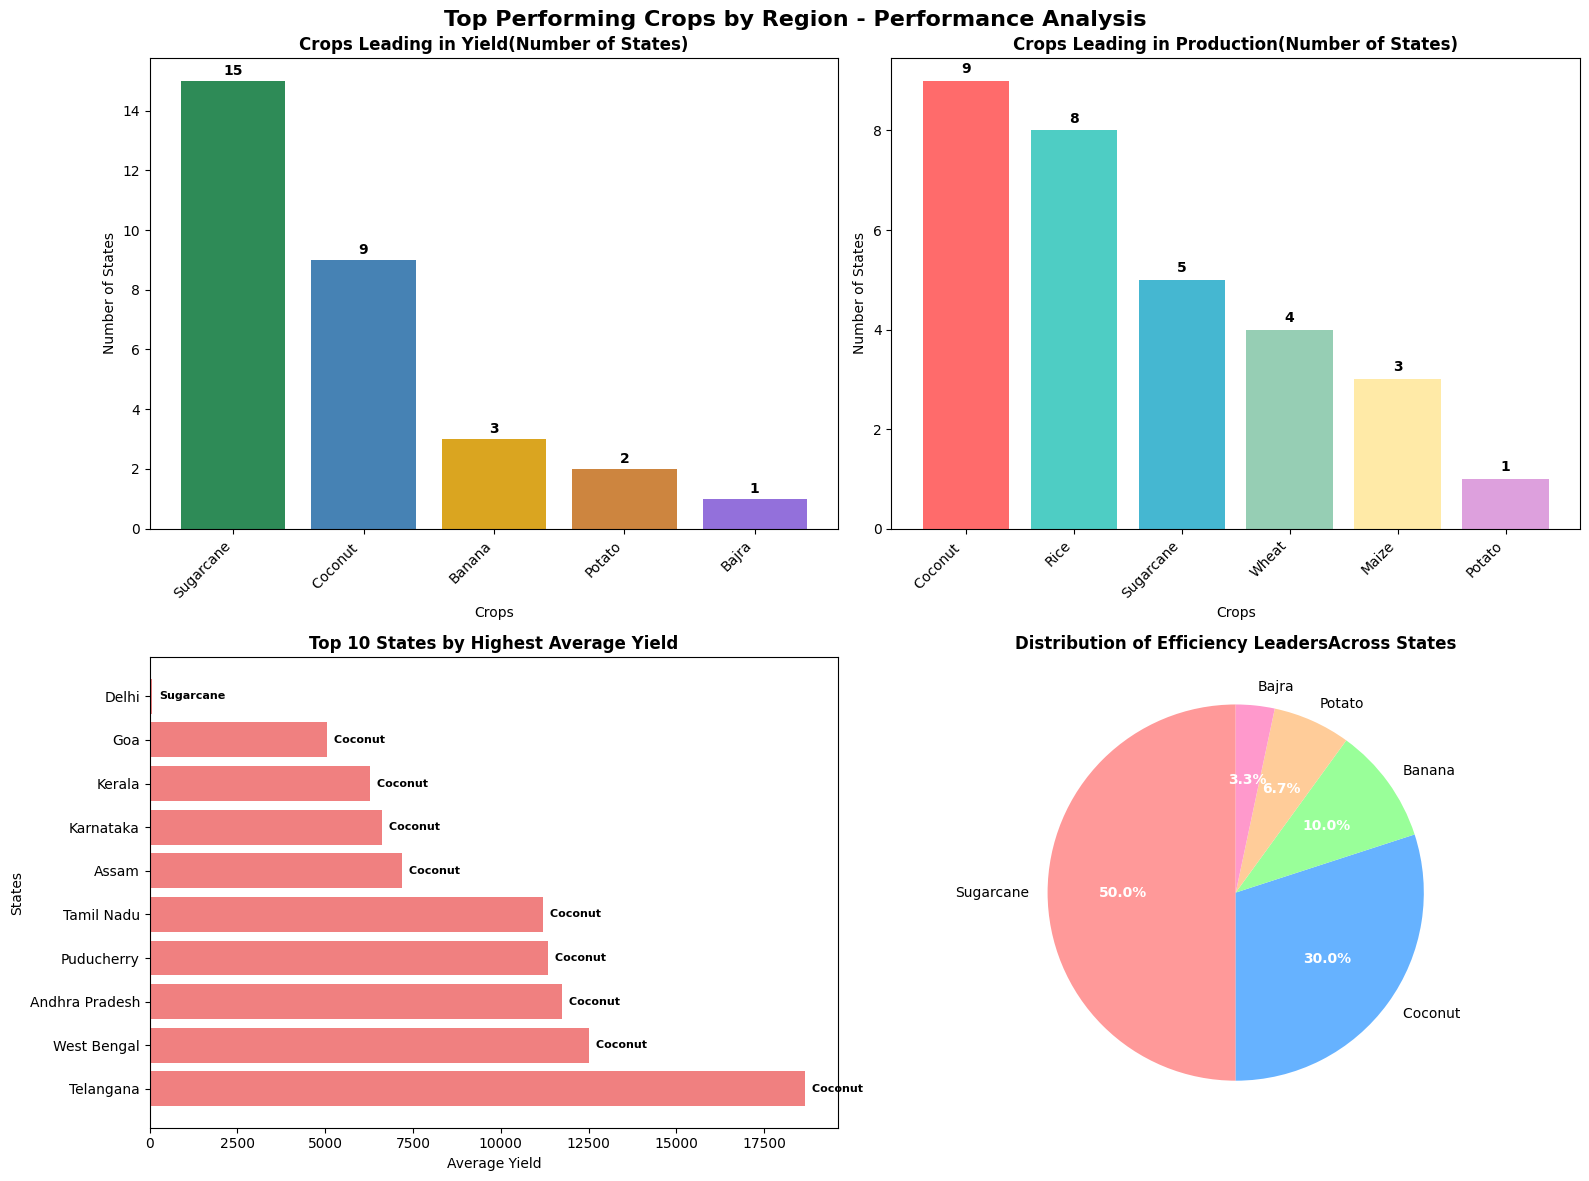

Regional crop performance visualization created successfully


In [11]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top Performing Crops by Region - Performance Analysis', fontsize=16, fontweight='bold')

# 1. Yield leaders by state count
ax1 = axes[0, 0]
yield_leaders_top = yield_leaders.head(8)
bars1 = ax1.bar(range(len(yield_leaders_top)), yield_leaders_top.values, 
                color=['#2E8B57', '#4682B4', '#DAA520', '#CD853F', '#9370DB', '#20B2AA', '#FF6347', '#32CD32'])
ax1.set_title('Crops Leading in Yield\
(Number of States)', fontweight='bold')
ax1.set_xlabel('Crops')
ax1.set_ylabel('Number of States')
ax1.set_xticks(range(len(yield_leaders_top)))
ax1.set_xticklabels(yield_leaders_top.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Production leaders by state count
ax2 = axes[0, 1]
production_leaders_top = production_leaders.head(8)
bars2 = ax2.bar(range(len(production_leaders_top)), production_leaders_top.values,
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])
ax2.set_title('Crops Leading in Production\
(Number of States)', fontweight='bold')
ax2.set_xlabel('Crops')
ax2.set_ylabel('Number of States')
ax2.set_xticks(range(len(production_leaders_top)))
ax2.set_xticklabels(production_leaders_top.index, rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 3. Top 10 states by highest yield values
ax3 = axes[1, 0]
top_yield_states = regional_performance.nlargest(10, 'Avg_Yield')
bars3 = ax3.barh(range(len(top_yield_states)), top_yield_states['Avg_Yield'],
                 color='lightcoral')
ax3.set_title('Top 10 States by Highest Average Yield', fontweight='bold')
ax3.set_xlabel('Average Yield')
ax3.set_ylabel('States')
ax3.set_yticks(range(len(top_yield_states)))
ax3.set_yticklabels(top_yield_states['State'])

# Add crop labels
for i, (idx, row) in enumerate(top_yield_states.iterrows()):
    ax3.text(row['Avg_Yield'] + 200, i, row['Top_Yield_Crop'], 
             va='center', fontsize=8, fontweight='bold')

# 4. Regional distribution pie chart
ax4 = axes[1, 1]
efficiency_leaders_pie = efficiency_leaders.head(6)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
wedges, texts, autotexts = ax4.pie(efficiency_leaders_pie.values, 
                                   labels=efficiency_leaders_pie.index,
                                   autopct='%1.1f%%', 
                                   colors=colors,
                                   startangle=90)
ax4.set_title('Distribution of Efficiency Leaders\
Across States', fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("Regional crop performance visualization created successfully")

In [12]:
def crop_dashboard(df, crop=None):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Filter for specific crop if provided
    if crop:
        df = df[df['Crop'].str.lower() == crop.lower()]
        title_suffix = f" - {crop.title()}"
    else:
        title_suffix = " - All Crops"

    # Remove "Whole Year" season (optional)
    df = df[df['Season'] != 'Whole Year']

    # Set up dashboard layout
    plt.figure(figsize=(18, 12))
    plt.suptitle(f"Crop Dashboard{title_suffix}", fontsize=20, fontweight='bold')

    # 1. Production Trend Over Years
    plt.subplot(2, 3, 1)
    prod_trend = df.groupby('Crop_Year')['Production'].sum()
    plt.plot(prod_trend.index, prod_trend.values, marker='o', color='green')
    plt.title("Production Over Years")
    plt.xlabel("Year")
    plt.ylabel("Total Production")

    # 2. Yield Trend Over Years
    plt.subplot(2, 3, 2)
    yield_trend = df.groupby('Crop_Year')['Yield'].mean()
    plt.plot(yield_trend.index, yield_trend.values, marker='o', color='blue')
    plt.title("Average Yield Over Years")
    plt.xlabel("Year")
    plt.ylabel("Yield (Avg)")

    # 3. Season Distribution
    plt.subplot(2, 3, 3)
    season_dist = df['Season'].value_counts()
    plt.pie(season_dist.values, labels=season_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title("Season Distribution")

    # 4. Top 10 Producing States
    plt.subplot(2, 3, 4)
    top_states = df.groupby('State')['Production'].sum().sort_values(ascending=False).head(10)
    sns.barplot(y=top_states.index, x=top_states.values, palette='crest')
    plt.title("Top 10 Producing States")
    plt.xlabel("Total Production")
    plt.ylabel("State")

    # 5. Area vs Yield (Scatter Plot)
    plt.subplot(2, 3, 5)
    sns.scatterplot(data=df, x='Area', y='Yield', hue='Season', alpha=0.6)
    plt.title("Area vs Yield")
    plt.xlabel("Area")
    plt.ylabel("Yield")

    # 6. Crop Diversity by State (if no specific crop)
    if not crop:
        plt.subplot(2, 3, 6)
        crop_div = df.groupby('State')['Crop'].nunique().sort_values(ascending=False).head(10)
        sns.barplot(x=crop_div.values, y=crop_div.index, palette='viridis')
        plt.title("Top 10 States by Crop Diversity")
        plt.xlabel("Unique Crops")
        plt.ylabel("State")
    else:
        plt.subplot(2, 3, 6)
        season_yield = df.groupby('Season')['Yield'].mean().sort_values()
        sns.barplot(x=season_yield.values, y=season_yield.index, palette='Set2')
        plt.title("Yield by Season")
        plt.xlabel("Average Yield")
        plt.ylabel("Season")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


C:\Users\shash\AppData\Local\Temp\ipykernel_2992\3954684622.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states.index, x=top_states.values, palette='crest')
C:\Users\shash\AppData\Local\Temp\ipykernel_2992\3954684622.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_div.values, y=crop_div.index, palette='viridis')


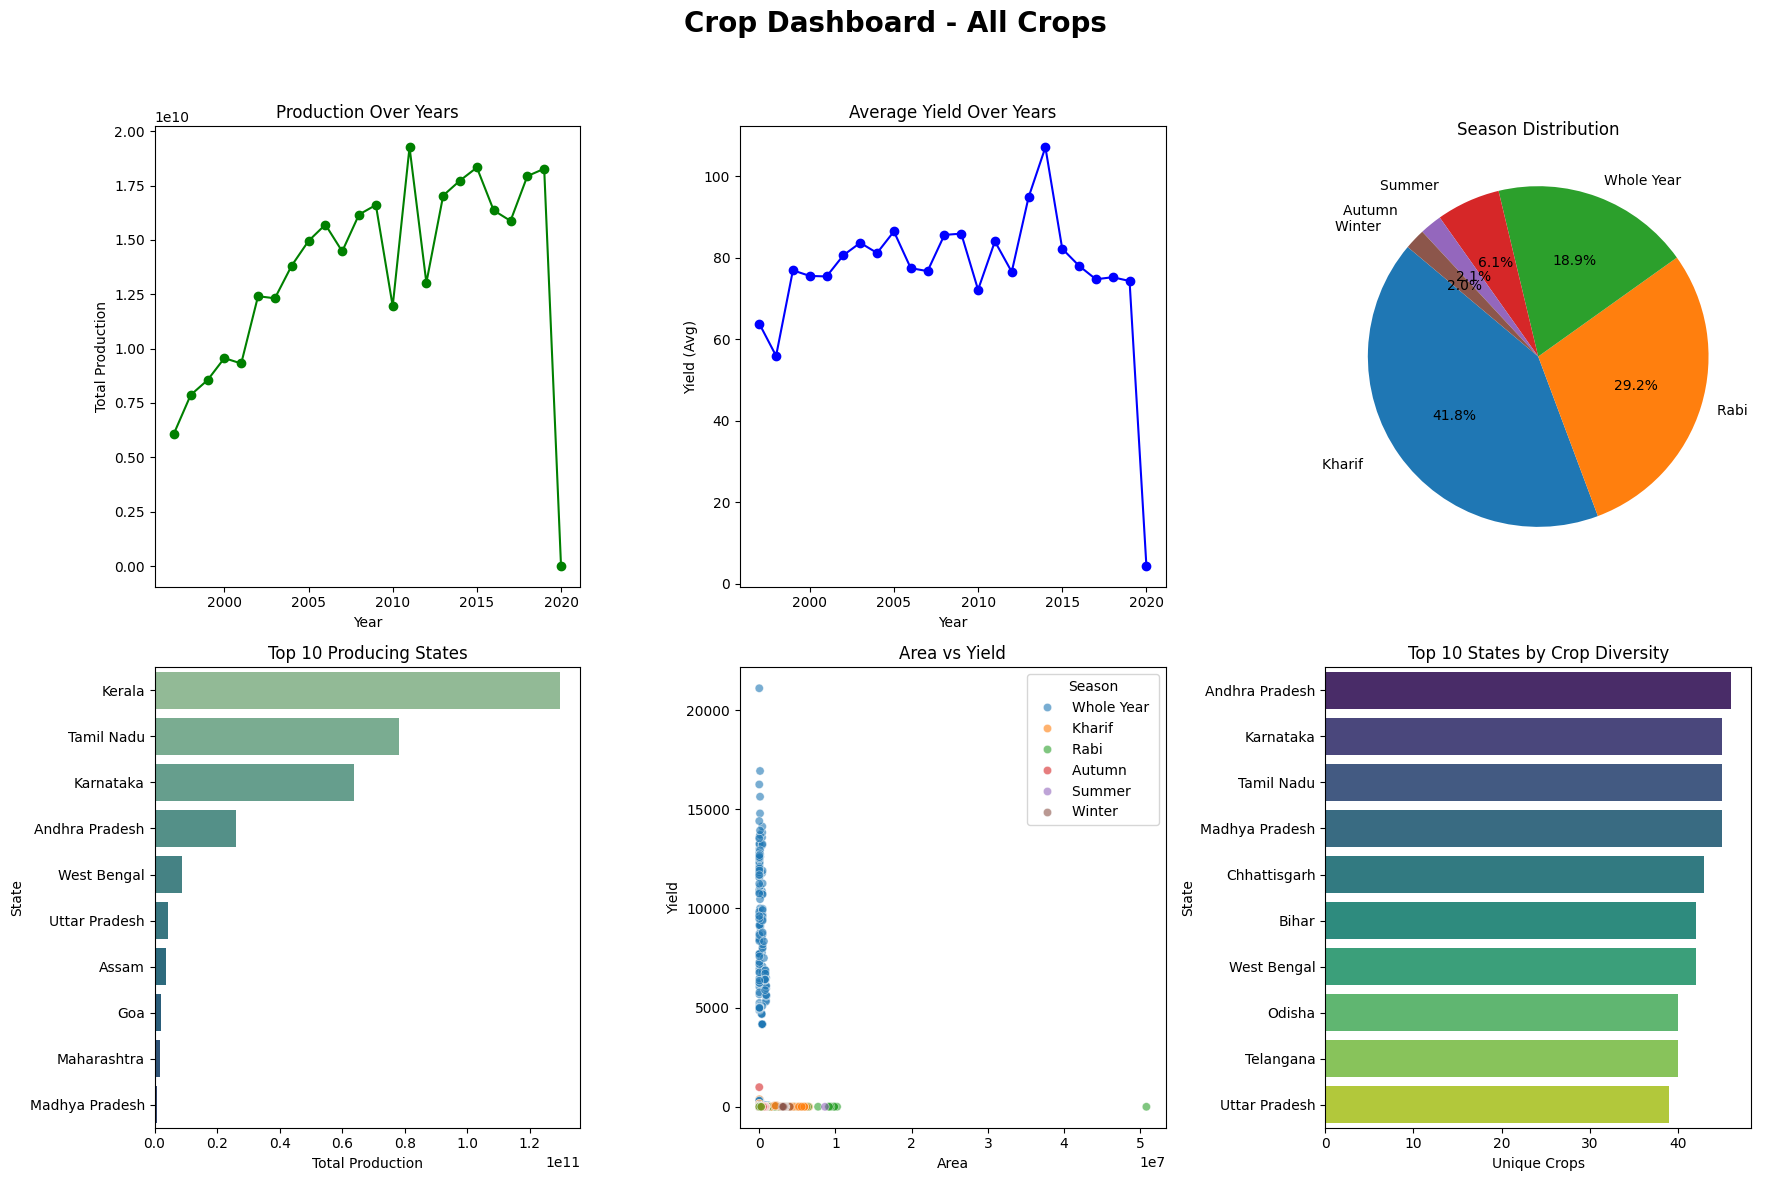

In [13]:
# For all crops
crop_dashboard(df)

C:\Users\shash\AppData\Local\Temp\ipykernel_2992\3954684622.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states.index, x=top_states.values, palette='crest')
C:\Users\shash\AppData\Local\Temp\ipykernel_2992\3954684622.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_div.values, y=crop_div.index, palette='viridis')


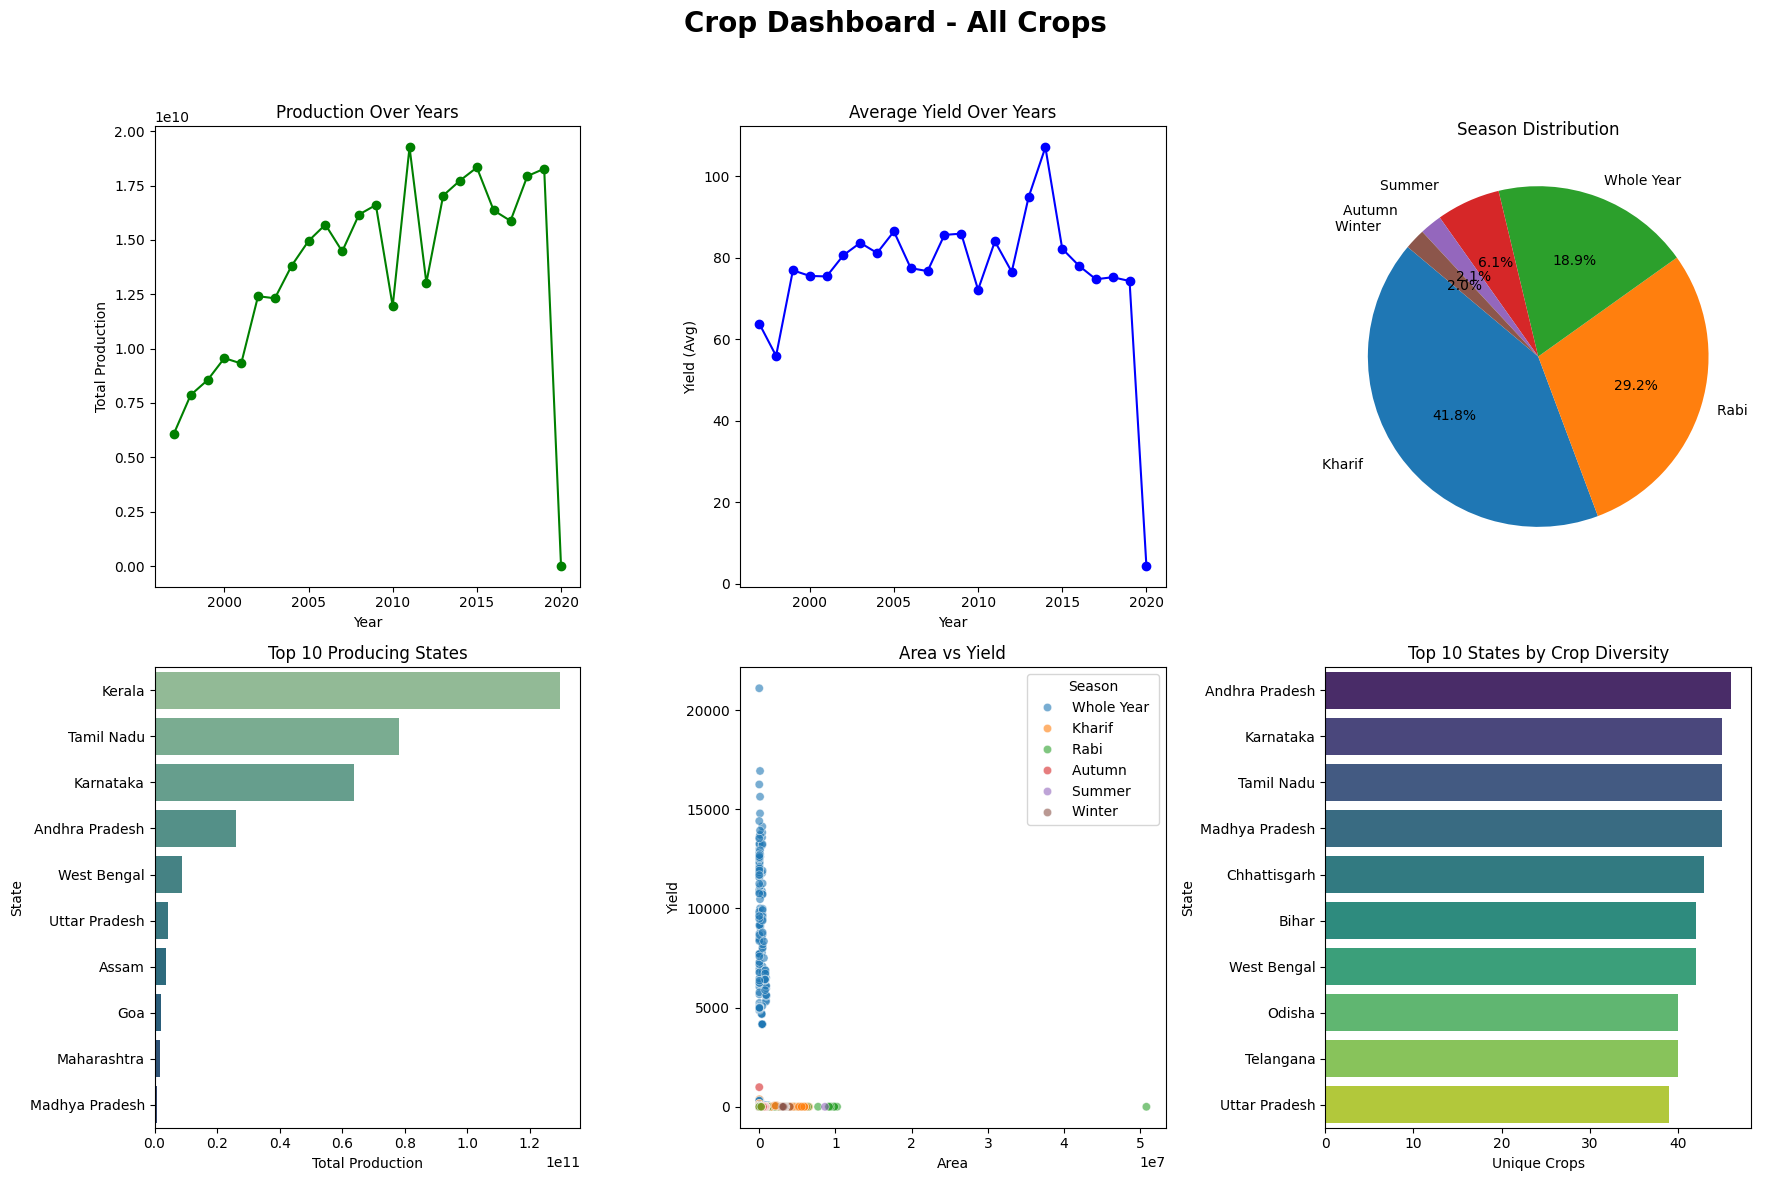

In [14]:
# For a specific crop
crop_dashboard(df)

In [15]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Efficiency,Production_Efficiency
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,0.768255,0.768255
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,0.705891,0.705891
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,0.027638,0.027638
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,6456.298331,6456.298331
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,0.456584,0.456584
